In [1]:
import os
import cv2 as cv
import requests
from bs4 import BeautifulSoup
dataurl = 'https://www.google.com.tw/search?ei=MswPXJnSDMaT8wWwoozQDA&yv=3&q={}&tbm=isch&vet=10ahUKEwiZs6TsgJjfAhXGybwKHTARA8oQuT0IMigB.MswPXJnSDMaT8wWwoozQDA.i&ved=0ahUKEwiZs6TsgJjfAhXGybwKHTARA8oQuT0IMigB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'

def getIdolImg(keyword, dstpath):
    for i in range(6):
        res = requests.get(dataurl.format(keyword, i * 100))
        soup = BeautifulSoup(res.text, 'lxml')
        for ele in soup.select('img'):
            imgurl = ele.get('src')
            if imgurl:
                fname = imgurl.split('tbn:')[1]
            else:
                imgurl = ele.get('data-src')
            fname  = imgurl.split('tbn:')[1]
            with open(dstpath + fname + '.jpg', 'wb') as f:
                res2 = requests.get(imgurl)
                f.write(res2.content)

In [8]:
if not os.path.exists('NiuChenZer'):
    os.mkdir('NiuChenZer/')
getIdolImg('鈕承澤', 'NiuChenZer/')

In [9]:
if not os.path.exists('ChuChungHeng'):
    os.mkdir('ChuChungHeng/')
getIdolImg('屈中恆', 'ChuChungHeng/')

In [10]:
if not os.path.exists('SungShaoChing'):
    os.mkdir('SungShaoChing/')
getIdolImg('宋少卿', 'SungShaoChing/')

In [2]:
from PIL import Image

def extractFace(srcpath, dstpath):
    if not os.path.exists(srcpath):
        os.mkdir(srcpath)
    if not os.path.exists(dstpath):
        os.mkdir(dstpath)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    face_cascade.load('C:/Users/owner/Anaconda3/pkgs/libopencv-3.4.2-h20b85fd_0/Library/etc/haarcascades/haarcascade_frontalface_default.xml')
    for fname in os.listdir(srcpath):
        img = Image.open(srcpath + fname)
        imgary = cv.imread(srcpath + fname)
        faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
        if len(faces) == 1:
            x,y,w,h = faces[0]
            crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
            crpim.save(dstpath + fname)

In [33]:
srcpath = 'NiuChenZer/' 
dstpath = 'NiuChenZerFace/'
extractFace(srcpath, dstpath)

In [34]:
srcpath = 'ChuChungHeng/' 
dstpath = 'ChuChungHengFace/'
extractFace(srcpath, dstpath)

In [35]:
srcpath = 'SungShaoChing/' 
dstpath = 'SungShaoChingFace/'
extractFace(srcpath, dstpath)

In [3]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     
                                   zoom_range = 0.2,      
                                   horizontal_flip = True 
                                  )

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory(
    'training/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 297 images belonging to 3 classes.


In [7]:
test_set = test_datagen.flow_from_directory(
    'testing/', target_size = (64, 64),
    batch_size = 10, 
    class_mode = 'categorical')

Found 71 images belonging to 3 classes.


In [8]:
history = classifier.fit_generator(training_set,
                         nb_epoch=30,
                         nb_val_samples=10,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=30, verbose=1, validation_data=<keras.pre..., epochs=30, validation_steps=10)`
  


Epoch 1/30
30/30 [==============================] - 22s 725ms/step - loss: 1.0525 - accuracy: 0.4916 - val_loss: 1.0133 - val_accuracy: 0.5055
Epoch 2/30
30/30 [==============================] - 2s 83ms/step - loss: 0.9953 - accuracy: 0.5387 - val_loss: 0.8917 - val_accuracy: 0.6374
Epoch 3/30
30/30 [==============================] - 2s 63ms/step - loss: 0.8426 - accuracy: 0.6330 - val_loss: 0.9755 - val_accuracy: 0.5934
Epoch 4/30
30/30 [==============================] - 2s 62ms/step - loss: 0.7361 - accuracy: 0.6734 - val_loss: 0.0269 - val_accuracy: 0.7073
Epoch 5/30
30/30 [==============================] - 2s 60ms/step - loss: 0.7681 - accuracy: 0.6936 - val_loss: 0.5860 - val_accuracy: 0.5934
Epoch 6/30
30/30 [==============================] - 2s 64ms/step - loss: 0.7117 - accuracy: 0.7104 - val_loss: 0.8824 - val_accuracy: 0.7143
Epoch 7/30
30/30 [==============================] - 2s 60ms/step - loss: 0.6620 - accuracy: 0.6970 - val_loss: 0.6446 - val_accuracy: 0.7692
Epoch 8/30


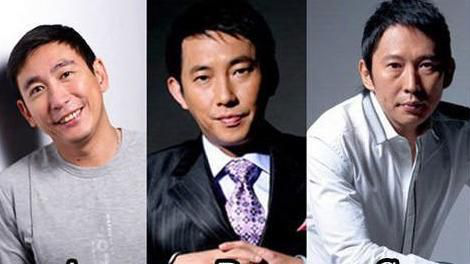

In [15]:
from PIL import Image
im = Image.open('5.jpg')
im

In [25]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade.load('C:/Users/owner/Anaconda3/pkgs/libopencv-3.4.2-h20b85fd_0/Library/etc/haarcascades/haarcascade_frontalface_default.xml')

img = cv.imread('5.jpg')
faces = face_cascade.detectMultiScale(img, 1.2, 3)
faces

array([[  6,  44,  94,  94],
       [365,  32,  86,  86],
       [170,  33, 103, 103]], dtype=int32)

In [26]:
transform_dic = {
    'ChuChungHengFace'  :  'Chu ',
    'NiuChenZerFace'    :  'Niu ',
    'SungShaoChingFace' :  'Sung '
}
name_dic = {v:transform_dic.get(k) for k,v in training_set.class_indices.items()}
name_dic

{0: 'Chu ', 1: 'Niu ', 2: 'Sung '}

In [27]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt 
font = cv.FONT_HERSHEY_PLAIN
for x,y,w,h in faces:
    box = (x, y, x+w, y+h)
    crpim = im.crop(box).resize((64,64))
    target_image = image.img_to_array(crpim)
    target_image = np.expand_dims(target_image, axis = 0)
    res = classifier.predict_classes(target_image)[0]
    cv.rectangle(img,(x,y),(x+w,y+h),(14,201,255),2)
    cv.putText(img,name_dic.get(res), (x + int(w/3)-70, y-10), font, 1.5, (14,201,255), 3)

Populating the interactive namespace from numpy and matplotlib


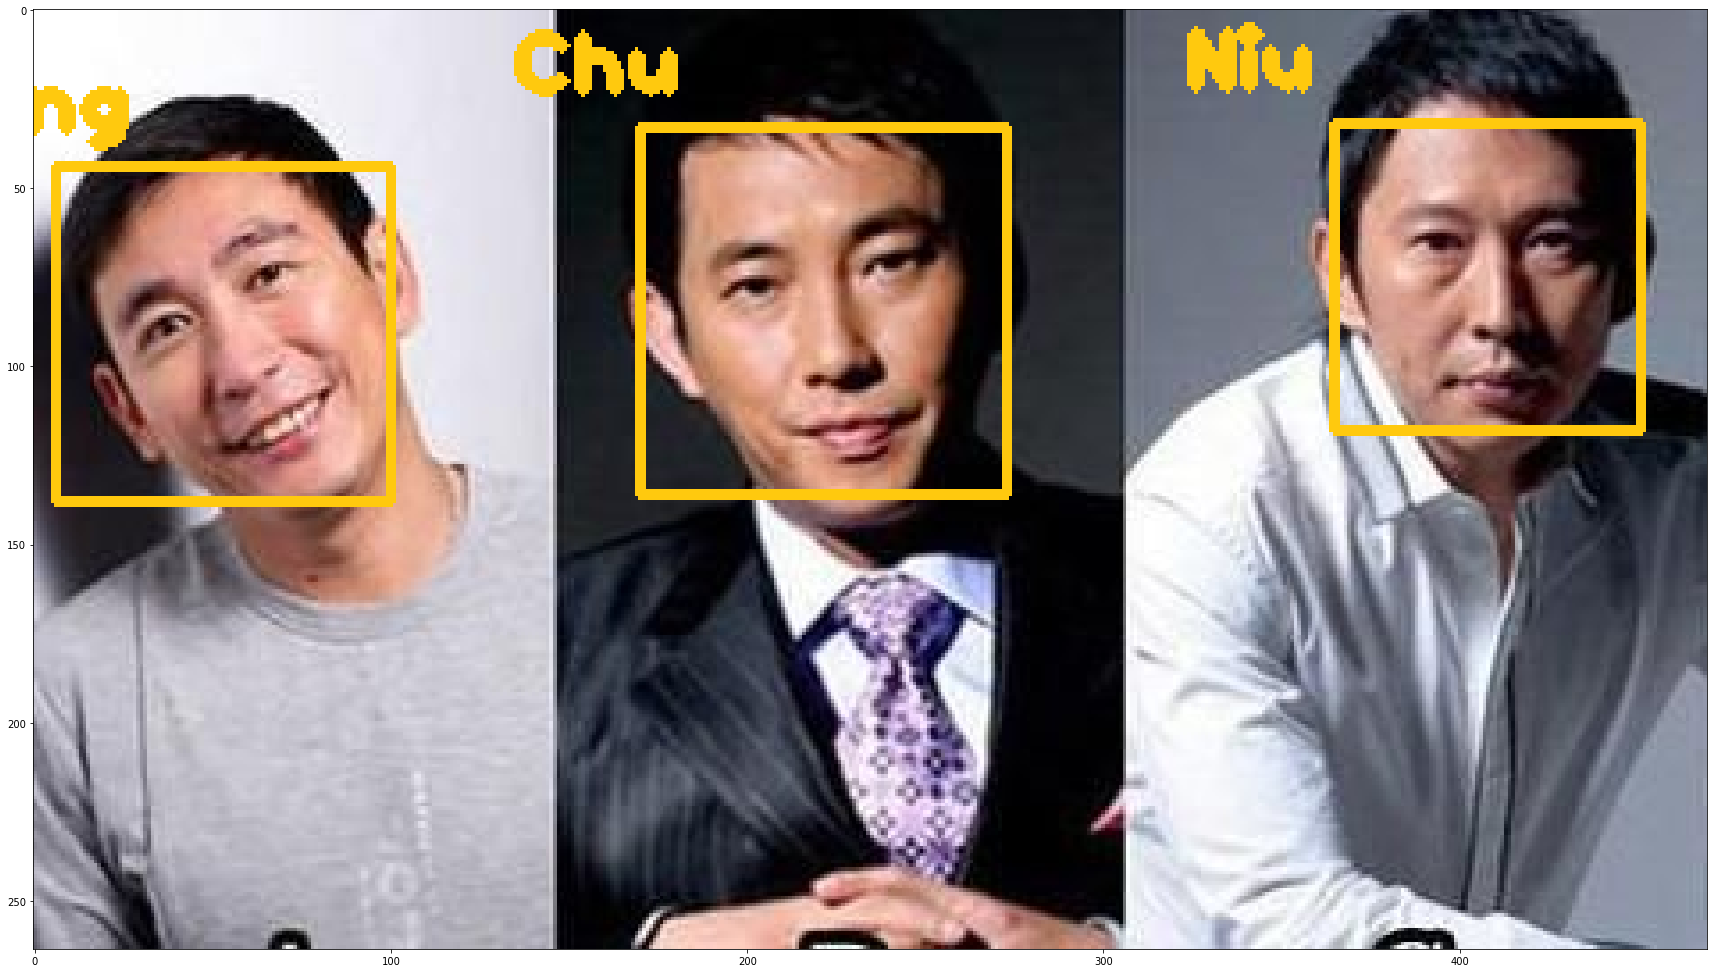

In [28]:
%pylab inline
plt.figure(figsize=(30,20))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [30]:
%reset -f